# DATA VISUALISATION

# --> Barcharts 

## Plotting a barchart from counts

In [1]:
import matplotlib.pyplot as plt
import numpy as np

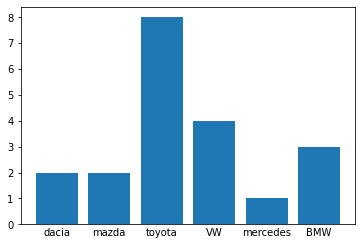

In [2]:
plt.bar(x=range(6), height=[2, 2, 8, 4, 1, 3], tick_label=['dacia', 'mazda', 'toyota', 'VW', 'mercedes', 'BMW'])
plt.tick_params(axis='x', length=0)
plt.show()

## Plotting a barchart from values (alphabetical order, by default)

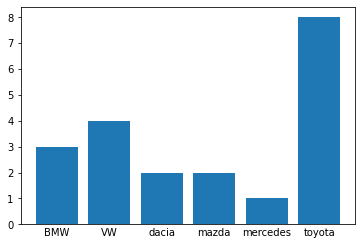

In [3]:
makes = np.array(["toyota", "BMW", "toyota", "VW", "mazda", "toyota", "dacia", "BMW", "mercedes", "toyota", "toyota", "toyota", "VW", "mazda", "toyota", "toyota", "dacia", "BMW", "VW", "VW"])
bar_data = np.unique(makes, return_counts=True)

plt.bar(x=range(len(bar_data[0])), height=bar_data[1], tick_label=bar_data[0])
plt.tick_params(axis='x', length=0)
plt.show()

## Plotting in descending order

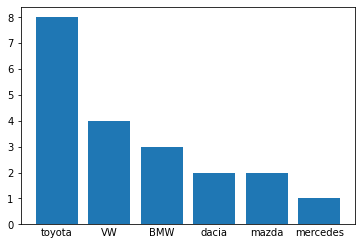

In [4]:
import pandas as pd
bar_data_tlst = list(zip(*bar_data))
bar_data_tlst.sort(key=lambda x: x[1], reverse=True)
bar_data_slst = list(zip(*bar_data_tlst))

plt.bar(x=range(len(bar_data_slst[0])), height=bar_data_slst[1], tick_label=bar_data_slst[0])
plt.tick_params(axis='x', length=0)
plt.show()

## Plotting with a particular order of values

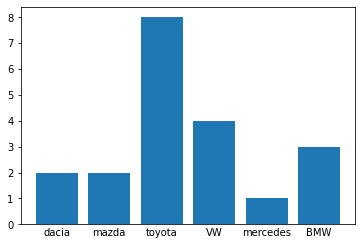

In [5]:
order = ['dacia', 'mazda', 'toyota', 'VW', 'mercedes', 'BMW']
bar_data_tlst = list(zip(*bar_data))
bar_data_tlst.sort(key=lambda x: order.index(x[0]))
bar_data_slst = list(zip(*bar_data_tlst))

plt.bar(x=range(len(bar_data_slst[0])), height=bar_data_slst[1], tick_label=bar_data_slst[0])
plt.tick_params(axis='x', length=0)
plt.show()

# --> Histograms 

## Plotting a histogram from values

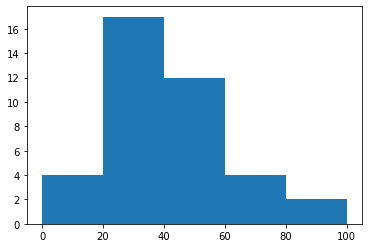

In [6]:
plt.hist([3,5,7,17,21,21,23,25,25,28,30,31,32,33,33,33,34,36,37,38,39,41,44,44,45,47,49,
50,50,52,55,56,57,62,66,70,76,84,91], bins=[0, 20, 40, 60, 80, 100])
plt.show()

## Plotting a histogram from a frequency table (all ranges equal)

Create a frequency table from scratch.

In [7]:
import pandas as pd
freq_tab_df = pd.DataFrame({'count':[4,17,12,6]}, index=['0-19','20-39','40-59', '60-79'])
freq_tab_df

,count
0-19,4
20-39,17
40-59,12
60-79,6


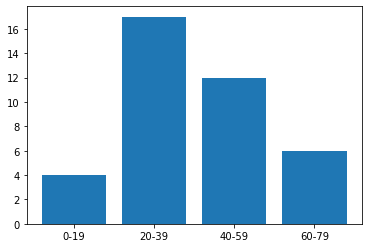

In [8]:
plt.bar(freq_tab_df.index, freq_tab_df['count'])
plt.show()

## Plotting a histogram from a frequency table (some ranges different)

Create a frequency table from scratch.

In [9]:
import pandas as pd
freq_tab_df = pd.DataFrame({'count':[4,17,12,6]}, index=['0-19','20-39','40-59', '60-99'])
freq_tab_df

,count
0-19,4
20-39,17
40-59,12
60-99,6


We create another table to hold the information that is needed for plotting the histogram

In [10]:
hist_tab_df = freq_tab_df.copy()
hist_tab_df

,count
0-19,4
20-39,17
40-59,12
60-99,6


In this particular table we can extract the bin widths from the index, so let's do that. We will also save the lower and upper bounds as we will need them later.

The index must be converted to a pandas series before it can be processed. A pandas series can be used as a numpy array.

In [11]:
hist_tab_df[['lbound', 'rbound']] = hist_tab_df.index.to_series().str.split('-', expand = True).astype('int')
hist_tab_df['width'] = hist_tab_df['rbound'] - hist_tab_df['lbound'] + 1
hist_tab_df

,count,lbound,rbound,width
0-19,4,0,19,20
20-39,17,20,39,20
40-59,12,40,59,20
60-99,6,60,99,40


Now we calculate the heights with the bin width factored in.

In [12]:
hist_tab_df['divisors'] = hist_tab_df['width'] / hist_tab_df['width'][0]
hist_tab_df['height'] = hist_tab_df['count'] / hist_tab_df['divisors']
hist_tab_df

,count,lbound,rbound,width,divisors,height
0-19,4,0,19,20,1.0,4.0
20-39,17,20,39,20,1.0,17.0
40-59,12,40,59,20,1.0,12.0
60-99,6,60,99,40,2.0,3.0


Calculate the bin mid-points as this is where the x-axis labels need to go.

In [13]:
hist_tab_df['mid_point'] = (hist_tab_df['rbound'] + hist_tab_df['lbound']) / 2
hist_tab_df

,count,lbound,rbound,width,divisors,height,mid_point
0-19,4,0,19,20,1.0,4.0,9.5
20-39,17,20,39,20,1.0,17.0,29.5
40-59,12,40,59,20,1.0,12.0,49.5
60-99,6,60,99,40,2.0,3.0,79.5


Plot the histogram using the method for a bar chart, since we have the counts. The width we use for the bars is a little bit narrower than the bin width, so that the bars appear separated.

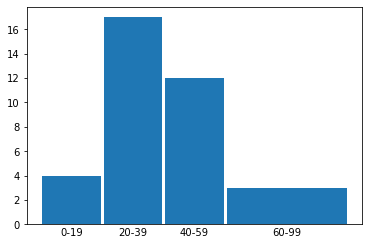

In [14]:
plt.tick_params(axis='x', length=0)
plt.bar(x=hist_tab_df['mid_point'], height=hist_tab_df['height'], width=hist_tab_df['width'] - 1, tick_label=hist_tab_df.index)
plt.show()

# \[running another notebook\]

In order to work with data prepared in another notebook, we can run this other notebook using `%run`.

**NOTE:** Before running the next cell, you must either place the file *LAB_Preparation_3.0_DEMO.ipynb* into the directory where this notebook is or adjust the path to match what you have on your computer (e.g. 
`%run ../1Preparation/LAB_Preparation_3.0_DEMO.ipynb`).


In [15]:
%run ../1Preparation/PY_Preparation_DEMO.ipynb

float64
object


<ipython-input-15-5c8b0f4d3a6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_food_times_df.dropna(inplace=True)
<ipython-input-15-18000cb144f9>:1: FutureWarning: ['name', 'ingredients', 'diet', 'flavor_profile', 'course', 'region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ind_food_df.groupby('state').agg(['count', 'mean'])


After running the data preparation notebook we have data frame `ind_food_df` and `ind_food_times_df` at our disposal.

In [16]:
ind_food_df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10.0,50.0,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10.0,50.0,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10.0,20.0,sweet,dessert,NaN,NaN
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20.0,30.0,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10.0,40.0,sweet,dessert,NaN,NaN


In [17]:
ind_food_times_df

,prep_time,cook_time,time_sum,time_sum_cat
0,45.0,25.0,70.0,medium
1,80.0,30.0,110.0,long
2,15.0,60.0,75.0,medium
3,15.0,30.0,45.0,medium
4,15.0,40.0,55.0,medium
5,10.0,50.0,60.0,medium
6,10.0,50.0,60.0,medium
7,10.0,20.0,30.0,short
8,20.0,30.0,50.0,medium
9,10.0,40.0,50.0,medium


# --> Box-and-whisker diagrams

## Plotting a box-and-whisker diagram

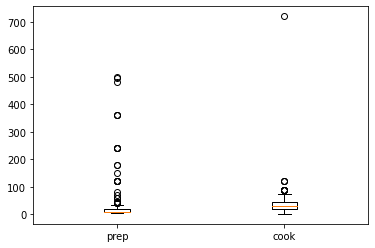

In [18]:
plt.boxplot([ind_food_times_df['prep_time'], ind_food_times_df['cook_time']], labels=["prep", "cook"])
plt.show()

## Plotting side-by-side box-and-whisker diagrams for categories

We are plotting the preparation time (variable `prep_time`), grouped by course, i.e. the different values of the categorical variable `course`.

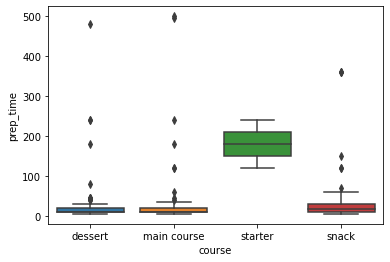

In [19]:
import seaborn as sns
sns.boxplot(data=ind_food_df, x='course', y='prep_time' )
plt.show()

# DATA SUMMARISATION

## Measures of central tendency

There are methods for these in many libraries, including numpy and pandas.

In [20]:
np.mean(ind_food_times_df['prep_time'])

35.38666666666666

In [21]:
np.median(ind_food_times_df['prep_time'])

10.0

In [22]:
import scipy.stats as sts
sts.mode(ind_food_times_df['prep_time'])

ModeResult(mode=array([10.]), count=array([98]))

In [23]:
ind_food_times_df.mean()

<ipython-input-23-87fe5c7e10dd>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ind_food_times_df.mean()


prep_time    35.386667
cook_time    38.724444
time_sum     74.111111
dtype: float64

In [24]:
ind_food_times_df = ind_food_times_df.drop(['time_sum_cat'], axis=1)
ind_food_times_df

,prep_time,cook_time,time_sum
0,45.0,25.0,70.0
1,80.0,30.0,110.0
2,15.0,60.0,75.0
3,15.0,30.0,45.0
4,15.0,40.0,55.0
5,10.0,50.0,60.0
6,10.0,50.0,60.0
7,10.0,20.0,30.0
8,20.0,30.0,50.0
9,10.0,40.0,50.0


In [25]:
ind_food_times_df[['prep_time', 'cook_time', 'time_sum']].mean()

prep_time    35.386667
cook_time    38.724444
time_sum     74.111111
dtype: float64

In [26]:
ind_food_times_df[['prep_time', 'cook_time', 'time_sum']].median()

prep_time    10.0
cook_time    30.0
time_sum     50.0
dtype: float64

In [27]:
ind_food_times_df.mode()

,prep_time,cook_time,time_sum
0,10.0,30.0,50.0


## Measures of spread (variation)

In [28]:
c = ind_food_times_df['cook_time']

**Range** of a single attribute

In [29]:
c.max() - c.min()

718.0

**Range** of all attributes

In [30]:
ranges = ind_food_times_df.max() - ind_food_times_df.min()
ranges

prep_time    495.0
cook_time    718.0
time_sum     720.0
dtype: float64

**Inter-quartile range (IQR)** for a single attribute

In [31]:
c.quantile(.75) - c.quantile(.25)

25.0

**Inter-quartile range (IQR)** for all attributes

In [32]:
q25 = ind_food_times_df.quantile(.25) 
q75 = ind_food_times_df.quantile(.75) 
iqr = q75 - q25
iqr

prep_time    10.0
cook_time    25.0
time_sum     30.0
dtype: float64

**Sample** variance and standard deviation

The ddof (difference in degrees of freedom) is 1 by default, which means that the variance is divided by n-1 (i.e. `n - ddof = n - 1`).

In [33]:
ind_food_times_df.var(), ind_food_times_df.std()

(prep_time    5812.702500
 cook_time    2460.307659
 time_sum     9110.875992
 dtype: float64,
 prep_time    76.241081
 cook_time    49.601488
 time_sum     95.450909
 dtype: float64)

**Population** variance and standard deviation

The ddof (difference in degrees of freedom) is 0, which means that the variance is divided by n (i.e. `n - ddof = n - 0 = n`).

In [34]:
ind_food_times_df.var(ddof=0), ind_food_times_df.std(ddof=0)

(prep_time    5786.868267
 cook_time    2449.372958
 time_sum     9070.383210
 dtype: float64,
 prep_time    76.071468
 cook_time    49.491140
 time_sum     95.238559
 dtype: float64)

## Getting multiple statistics at once

In [35]:
ind_food_times_df.describe()

,prep_time,cook_time,time_sum
count,225.000000,225.000000,225.000000
mean,35.386667,38.724444,74.111111
std,76.241081,49.601488,95.450909
min,5.000000,2.000000,10.000000
25%,10.000000,20.000000,35.000000
50%,10.000000,30.000000,50.000000
75%,20.000000,45.000000,65.000000
max,500.000000,720.000000,730.000000


# DATA TRANSFORMATION

## Min-max normalisation

First we will remove the most extreme outliers.

In [36]:
print(ind_food_times_df.shape)
ind_food_times_df.drop(ind_food_times_df[(ind_food_times_df['prep_time'] > 200) | (ind_food_times_df['cook_time'] > 200)].index, inplace=True)
print(ind_food_times_df.shape)

(225, 3)
(214, 3)


Normalise explicitly

In [37]:
p = ind_food_times_df['prep_time']
c = ind_food_times_df['cook_time']
ind_food_times_norm_df = pd.DataFrame({'prep_time':(p - p.min())/(p.max() - p.min()),
                                       'cook_time':(c - c.min())/(c.max() - c.min())})
ind_food_times_norm_df

,prep_time,cook_time
0,0.228571,0.194915
1,0.428571,0.237288
2,0.057143,0.491525
3,0.057143,0.237288
4,0.057143,0.322034
5,0.028571,0.406780
6,0.028571,0.406780
7,0.028571,0.152542
8,0.085714,0.237288
9,0.028571,0.322034


Normalise using a library method

In [38]:
import sklearn.preprocessing as pp

In [39]:
mm_scaler = pp.MinMaxScaler()
ind_food_times_norm_df2 = pd.DataFrame(mm_scaler.fit_transform(ind_food_times_df), columns=ind_food_times_df.columns)
ind_food_times_norm_df2

,prep_time,cook_time,time_sum
0,0.228571,0.194915,0.260870
1,0.428571,0.237288,0.434783
2,0.057143,0.491525,0.282609
3,0.057143,0.237288,0.152174
4,0.057143,0.322034,0.195652
5,0.028571,0.406780,0.217391
6,0.028571,0.406780,0.217391
7,0.028571,0.152542,0.086957
8,0.085714,0.237288,0.173913
9,0.028571,0.322034,0.173913


## Standardisation

In [40]:
std_scaler = pp.StandardScaler()
ind_food_times_std_df = pd.DataFrame(std_scaler.fit_transform(ind_food_times_df), columns=ind_food_times_df.columns)
ind_food_times_std_df

,prep_time,cook_time,time_sum
0,0.925643,-0.529744,0.445557
1,2.260723,-0.248859,1.646807
2,-0.218711,1.436451,0.595713
3,-0.218711,-0.248859,-0.305224
4,-0.218711,0.312911,-0.004912
5,-0.409436,0.874681,0.145245
6,-0.409436,0.874681,0.145245
7,-0.409436,-0.810629,-0.755693
8,-0.027985,-0.248859,-0.155068
9,-0.409436,0.312911,-0.155068


In [41]:
ind_food_times_std_df.describe()

,prep_time,cook_time,time_sum
count,2.140000e+02,2.140000e+02,2.140000e+02
mean,4.481099e-17,4.233374e-16,1.696462e-16
std,1.002345e+00,1.002345e+00,1.002345e+00
min,-6.001621e-01,-1.821815e+00,-1.356318e+00
25%,-4.094364e-01,-8.106289e-01,-6.055365e-01
50%,-4.094364e-01,-2.488589e-01,-1.550679e-01
75%,-2.798499e-02,3.129112e-01,1.452446e-01
max,6.075237e+00,4.807072e+00,5.550868e+00


# MORE PROCESSING

Removing outliers based on IQR

In [64]:
high_outlier_inds = ind_food_times_df > (q75 + iqr * 1.5)
low_outlier_inds = ind_food_times_df < (q25 - iqr * 1.5)
olc = high_outlier_inds[['cook_time', 'prep_time']].sum(axis=1) + low_outlier_inds[['cook_time', 'prep_time']].sum(axis=1)
ind_food_times_df = ind_food_times_df.drop(ind_food_times_df.index[olc>0])
ind_food_times_df = ind_food_times_df.reset_index(drop=True)

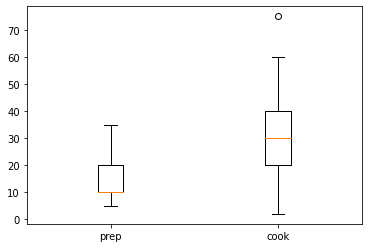

In [65]:
plt.boxplot([ind_food_times_df['prep_time'], ind_food_times_df['cook_time']], labels=["prep", "cook"])
plt.show()